In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

import numpy as np
from astropy.table import Table, hstack, join
import dustmaps.bayestar, dustmaps.sfd
import astropy.units as units
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import tensorflow as tf

%cd ..
from starlight.models_cy import *
%cd Starlight

/Users/bl/Dropbox/repos/starlight
/Users/bl/Dropbox/repos/starlight/starlight


In [2]:
import gaia_tools.select
import gaia_tools.load as gload

In [3]:
tgas_cat = gload.tgas()
twomass = gload.twomass()

In [4]:
tgas_cat.dtype.names

('hip',
 'tycho2_id',
 'solution_id',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_good_obs_ac',
 'astrometric_n_bad_obs_al',
 'astrometric_n_bad_obs_ac',
 'astrometric_delta_q',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_primary_flag',
 'astrometric_relegation_factor',
 'astrometric_weight_al',
 'astrometric_weight_ac',
 'astrometric_priors_used',
 'matched_observations',
 'duplicated_source',
 'scan_direction_strength_k1',
 'scan_direction_strength_k2',
 'scan_direction_strength_k3',
 'scan_direction_strength_k4',
 'scan_direction_mean_k1',


In [5]:
twomass.dtype.names

('ra',
 'dec',
 'key',
 'err_major',
 'err_minor',
 'err_angle',
 'designation',
 'northern_hemi',
 'galaxy_contam',
 'prox',
 'prox_angle',
 'prox_key',
 'date_year',
 'date_month',
 'date_day',
 'jdate',
 'scan',
 'minor_planet',
 'phi_opt',
 'glon',
 'glat',
 'x_scan',
 'n_opt_matches',
 'dist_opt',
 'b_m_opt',
 'vr_m_opt',
 'dist_edge_ns',
 'dist_edge_ew',
 'dist_flag_ns',
 'dist_flag_ew',
 'dup_src',
 'use_src',
 'association',
 'coadd_key',
 'coadd',
 'scan_key',
 'xsc_key',
 'j_mag',
 'j_cmsig',
 'j_msigcom',
 'j_m_stdap',
 'j_msig_stdap',
 'j_snr',
 'j_quality',
 'j_read',
 'j_blend',
 'j_cc',
 'j_ndet_m',
 'j_ndet_n',
 'j_psfchi',
 'h_mag',
 'h_cmsig',
 'h_msigcom',
 'h_m_stdap',
 'h_msig_stdap',
 'h_snr',
 'h_quality',
 'h_read',
 'h_blend',
 'h_cc',
 'h_ndet_m',
 'h_ndet_n',
 'h_psfchi',
 'k_mag',
 'k_cmsig',
 'k_msigcom',
 'k_m_stdap',
 'k_msig_stdap',
 'k_snr',
 'k_quality',
 'k_read',
 'k_blend',
 'k_cc',
 'k_ndet_m',
 'k_ndet_n',
 'k_psfchi',
 'matched',
 'matchdist')

In [6]:
tsf = gaia_tools.select.tgasSelect()

/Users/bl/anaconda3/lib/python3.5/site-packages/gaia_tools-0.1-py3.5.egg/gaia_tools/select/tgasSelect.py:133: RuntimeWarning: invalid value encountered in greater
  *(self._full_twomass['j_mag'] < 10.)

/Users/bl/anaconda3/lib/python3.5/site-packages/gaia_tools-0.1-py3.5.egg/gaia_tools/select/tgasSelect.py:133: RuntimeWarning: invalid value encountered in less
  *(self._full_twomass['j_mag'] < 10.)

/Users/bl/anaconda3/lib/python3.5/site-packages/gaia_tools-0.1-py3.5.egg/gaia_tools/select/tgasSelect.py:173: RuntimeWarning: invalid value encountered in greater
  *(self._full_twomass['j_mag'] < jmax)

/Users/bl/anaconda3/lib/python3.5/site-packages/gaia_tools-0.1-py3.5.egg/gaia_tools/select/tgasSelect.py:173: RuntimeWarning: invalid value encountered in less
  *(self._full_twomass['j_mag'] < jmax)

/Users/bl/anaconda3/lib/python3.5/site-packages/gaia_tools-0.1-py3.5.egg/gaia_tools/select/tgasSelect.py:195: RuntimeWarning: invalid value encountered in true_divide
  numpy.nanmedian((nstart

In [7]:
indx = tsf.determine_statistical(tgas_cat, 
                                 twomass['j_mag'],
                                 twomass['k_mag'])

/Users/bl/anaconda3/lib/python3.5/site-packages/gaia_tools-0.1-py3.5.egg/gaia_tools/select/tgasSelect.py:284: RuntimeWarning: invalid value encountered in greater_equal
  *(j-k >= self._jkmin)*(j-k <= self._jkmax)

/Users/bl/anaconda3/lib/python3.5/site-packages/gaia_tools-0.1-py3.5.egg/gaia_tools/select/tgasSelect.py:284: RuntimeWarning: invalid value encountered in less_equal
  *(j-k >= self._jkmin)*(j-k <= self._jkmax)



In [8]:
#import healpy
#healpy.mollview(title="")
#healpy.projplot(tgas_cat['l'][indx],
#                tgas_cat['b'][indx],
#                'k,', lonlat=True, alpha=0.03);

In [9]:
#indx[:] = True
indx &= twomass['matched']
indx &= np.isfinite(twomass['j_msigcom'])
indx &= np.isfinite(twomass['h_msigcom'])
indx &= np.isfinite(twomass['k_msigcom'])
indx &= np.isfinite(tgas_cat['phot_g_mean_flux_error'])
indx &= np.isfinite(tgas_cat['parallax_error'])
indx &= tgas_cat['parallax_error'] > 0
indx &= (tgas_cat['parallax'] / tgas_cat['parallax_error'] > 1/1) # Main cut
print('Number of objects=', indx.sum())

Number of objects= 1124826


In [10]:
bayestar = dustmaps.bayestar.BayestarQuery(max_samples=1)
sfd = dustmaps.sfd.SFDQuery()

In [403]:
tgas_cat.dtype

dtype([('hip', '>i4'), ('tycho2_id', 'S12'), ('solution_id', '>i8'), ('source_id', '>i8'), ('random_index', '>i8'), ('ref_epoch', '>f8'), ('ra', '>f8'), ('ra_error', '>f8'), ('dec', '>f8'), ('dec_error', '>f8'), ('parallax', '>f8'), ('parallax_error', '>f8'), ('pmra', '>f8'), ('pmra_error', '>f8'), ('pmdec', '>f8'), ('pmdec_error', '>f8'), ('ra_dec_corr', '>f4'), ('ra_parallax_corr', '>f4'), ('ra_pmra_corr', '>f4'), ('ra_pmdec_corr', '>f4'), ('dec_parallax_corr', '>f4'), ('dec_pmra_corr', '>f4'), ('dec_pmdec_corr', '>f4'), ('parallax_pmra_corr', '>f4'), ('parallax_pmdec_corr', '>f4'), ('pmra_pmdec_corr', '>f4'), ('astrometric_n_obs_al', '>i4'), ('astrometric_n_obs_ac', '>i4'), ('astrometric_n_good_obs_al', '>i4'), ('astrometric_n_good_obs_ac', '>i4'), ('astrometric_n_bad_obs_al', '>i4'), ('astrometric_n_bad_obs_ac', '>i4'), ('astrometric_delta_q', '>f4'), ('astrometric_excess_noise', '>f8'), ('astrometric_excess_noise_sig', '>f8'), ('astrometric_primary_flag', '?'), ('astrometric_releg

In [323]:
sel = np.random.choice(np.where(indx)[0], int(1e6), replace=False)
sel = np.random.choice(np.where(indx)[0], indx.sum(), replace=False)

In [429]:
varpis = np.asarray(tgas_cat['parallax'][sel]).astype('f8')
varpis_var = np.asarray(tgas_cat['parallax_error'][sel]).astype('f8') ** 2.0

nobj = varpis.size

ls = np.asarray(tgas_cat['l'][sel]).astype('f8') 
bs = np.asarray(tgas_cat['b'][sel]).astype('f8') 
distances = (1000/varpis)
coords = SkyCoord(ls*units.deg, bs*units.deg, distance=distances*units.pc, frame='galactic')
ras, decs = coords.icrs.ra.rad, coords.icrs.dec.rad

ebv = bayestar(coords, mode='median')
ebv2 = sfd(coords)
ind2 = ~np.isfinite(ebv)
ebv[ind2] = 0#ebv2[ind2]

# Coefs from Lauren Anderson.
# Second set from http://astroquery.readthedocs.io/en/latest/irsa/irsa_dust.html
# see also http://iopscience.iop.org/article/10.1088/0004-637X/737/2/103/pdf 
# for others bandpasses.

G_RedCoeff = 2.55
J_RedCoeff = 0.709 # 0.723 
H_RedCoeff = 0.449 # 0.46
K_RedCoeff = 0.30 # 0.31

zeropoint = 25.52477
gmag = zeropoint - 2.5*np.log(np.asarray(tgas_cat['phot_g_mean_flux'][sel]).astype('f8'))/np.log(10.)
gmag_err = -2.5/np.log(10.) * np.asarray(tgas_cat['phot_g_mean_flux_error'][sel] / tgas_cat['phot_g_mean_flux'][sel]).astype('f8')

obsmags = np.asarray(twomass['j_mag'][sel]).astype('f8')
obscolors = np.vstack((
    np.asarray(twomass['j_mag'][sel] - twomass['k_mag'][sel]).astype('f8'),
    np.asarray(twomass['j_mag'][sel] - twomass['h_mag'][sel]).astype('f8'),
    np.asarray(twomass['k_mag'][sel] - twomass['h_mag'][sel]).astype('f8')
)).T
#obscolors = np.asarray(twomass['j_mag'][sel] - twomass['k_mag'][sel]).astype('f8')[:, None]

ncols = obscolors.shape[1]

obsmagsandcolors = np.zeros((nobj, ncols+1))
obsmagsandcolors_var = np.zeros((nobj, ncols+1, ncols+1))

obsmagsandcolors[:, 0] = np.asarray(twomass['j_mag'][sel]).astype('f8')
obsmagsandcolors[:, 1] = np.asarray(twomass['j_mag'][sel] - twomass['k_mag'][sel]).astype('f8')
obsmagsandcolors[:, 2] = np.asarray(twomass['j_mag'][sel] - twomass['h_mag'][sel]).astype('f8')
obsmagsandcolors[:, 3] = np.asarray(twomass['k_mag'][sel] - twomass['h_mag'][sel]).astype('f8')
obsmagsandcolors_var[:, 0, 0] = np.asarray(twomass['j_msigcom'][sel]).astype('f8') ** 2.
if True:
    obsmagsandcolors_var[:, 0, 1] = np.asarray(twomass['j_msigcom'][sel]).astype('f8') ** 2.
    obsmagsandcolors_var[:, 0, 2] = np.asarray(twomass['j_msigcom'][sel]).astype('f8') ** 2.
    obsmagsandcolors_var[:, 1, 2] = np.asarray(twomass['j_msigcom'][sel]).astype('f8') ** 2.
    obsmagsandcolors_var[:, 2, 1] = np.asarray(twomass['j_msigcom'][sel]).astype('f8') ** 2.
    obsmagsandcolors_var[:, 1, 0] = np.asarray(twomass['j_msigcom'][sel]).astype('f8') ** 2.
    obsmagsandcolors_var[:, 2, 0] = np.asarray(twomass['j_msigcom'][sel]).astype('f8') ** 2.
obsmagsandcolors_var[:, 1, 1] = np.asarray(twomass['j_msigcom'][sel]**2. + twomass['k_msigcom'][sel]**2.).astype('f8')
obsmagsandcolors_var[:, 2, 2] = np.asarray(twomass['j_msigcom'][sel]**2. + twomass['h_msigcom'][sel]**2.).astype('f8')
obsmagsandcolors_var[:, 3, 3] = np.asarray(twomass['k_msigcom'][sel]**2. + twomass['h_msigcom'][sel]**2.).astype('f8')

dustcoefs = np.array([J_RedCoeff,
                      J_RedCoeff - K_RedCoeff, 
                      J_RedCoeff - H_RedCoeff,
                      K_RedCoeff - H_RedCoeff])[:ncols+1]

magname = 'J'
colnames = ['J-K', 'J-H', 'K-H'][:ncols]

obsabsmags = obsmags + 5*np.log10(varpis) - 10

dustamps = 1*ebv.astype('f8')
varpimagvar = (varpis_var**0.5 * 5 / varpis / np.log(10))**2.0


/Users/bl/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 451602 results
  r = func(a, **kwargs)



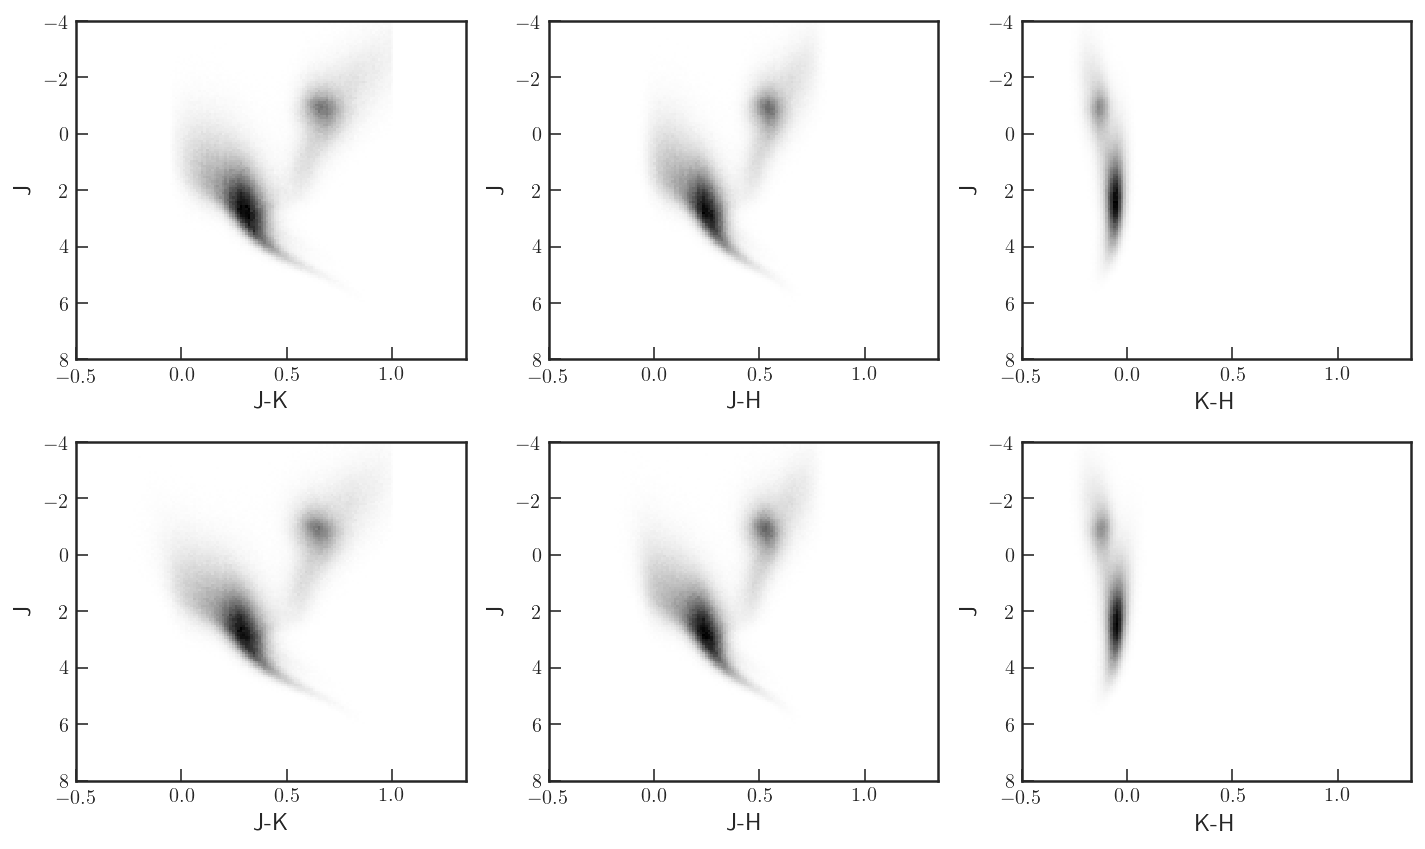

In [430]:
fig, axs = plt.subplots(2, ncols, figsize=(10, 6), sharex=False, sharey=False)
if ncols == 1:
    axs = axs.reshape((-1, 1))
rr = [[-0.5, 1.35], [-4, 6]]
nbins = 150
for i in range(ncols):
    axs[0, i].hist2d(obsmagsandcolors[:, i+1], 
                     obsmagsandcolors[:, 0] + 5*np.log10(varpis) - 10, 
                     nbins, range=rr, cmap="gray_r")
    axs[1, i].hist2d(obscolors[:, i] - dustamps * dustcoefs[i+1], 
                     obsabsmags - dustamps * dustcoefs[0], 
                     nbins, range=rr, cmap="gray_r")
    for j in range(2):
        axs[j, i].set_ylabel(magname)
        axs[j, i].set_xlabel(colnames[i])
        axs[j, i].set_ylim(rr[1][::-1])
        axs[j, i].set_xlim(rr[0])
fig.tight_layout()

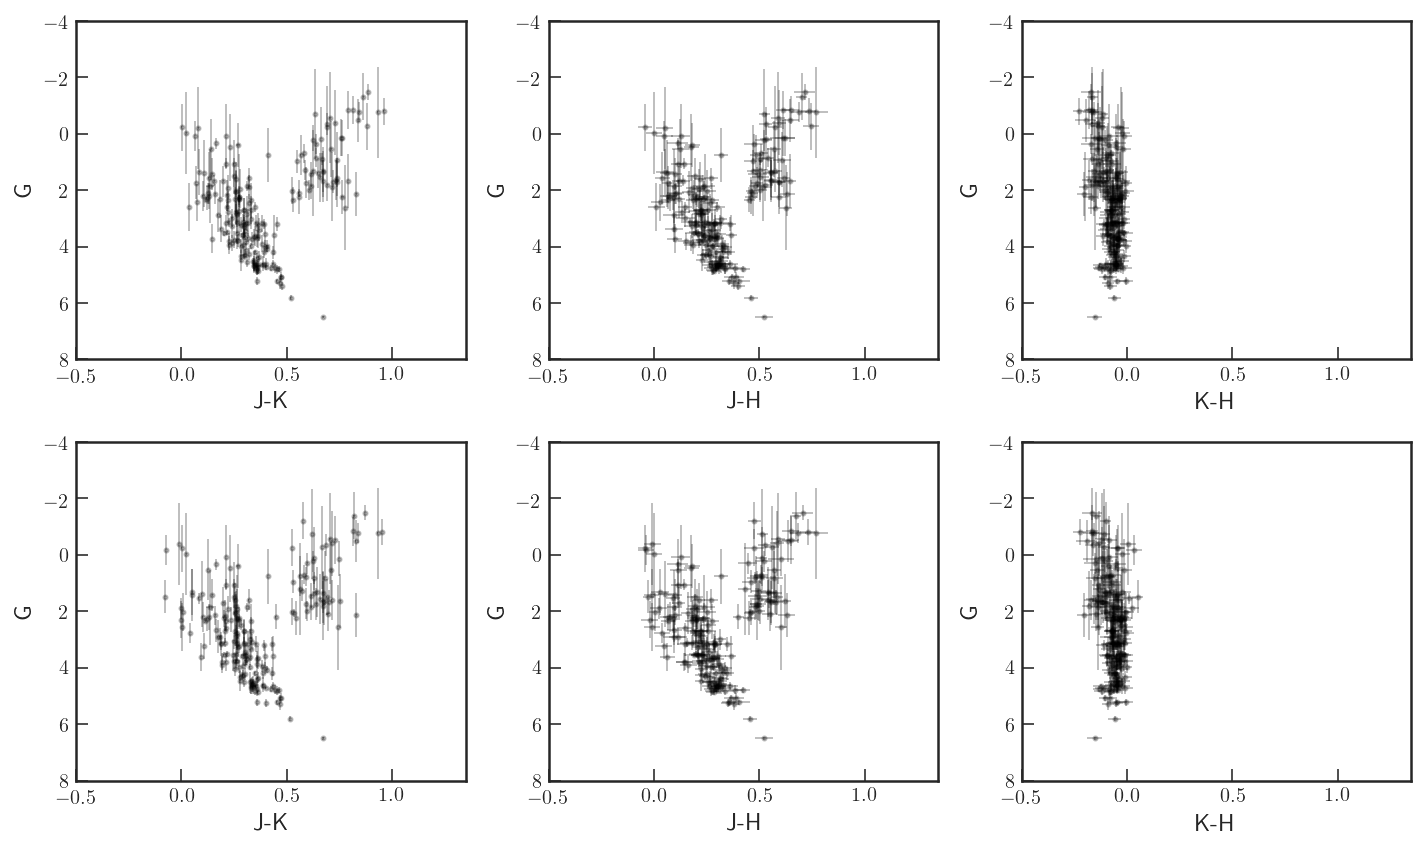

In [428]:
subsel = np.random.choice(nobj, int(2e2))
fig, axs = plt.subplots(2, ncols, figsize=(10, 6), sharex=False, sharey=False)
if ncols == 1:
    axs = axs.reshape((-1, 1))
rr = [[-0.5, 1.35], [-4, 6]]
for i in range(ncols):
    axs[0, i].errorbar(obsmagsandcolors[subsel, i+1], 
                      obsmagsandcolors[subsel, 0] + 5*np.log10(varpis[subsel]) - 10, 
                      xerr=obsmagsandcolors_var[subsel, i+1, i+1]**0.5,
                      yerr=(obsmagsandcolors_var[subsel, 0, 0] + varpimagvar[subsel])**0.5,
                      markersize=2, alpha=0.25, fmt="o", lw=1)
    axs[1, i].errorbar(obsmagsandcolors[subsel, i+1] - dustamps[subsel] * dustcoefs[i+1], 
                      obsmagsandcolors[subsel, 0] + 5*np.log10(varpis[subsel]) - 10 - dustamps[subsel] * dustcoefs[0], 
                      xerr=obsmagsandcolors_var[subsel, i+1, i+1]**0.5,
                      yerr=(obsmagsandcolors_var[subsel, 0, 0] + varpimagvar[subsel])**0.5,
                      markersize=2, alpha=0.25, fmt="o", lw=1)
    for j in range(2):
        axs[j, i].set_ylabel(magname)
        axs[j, i].set_xlabel(colnames[i])
        axs[j, i].set_ylim(rr[1][::-1])
        axs[j, i].set_xlim(rr[0])
fig.tight_layout()

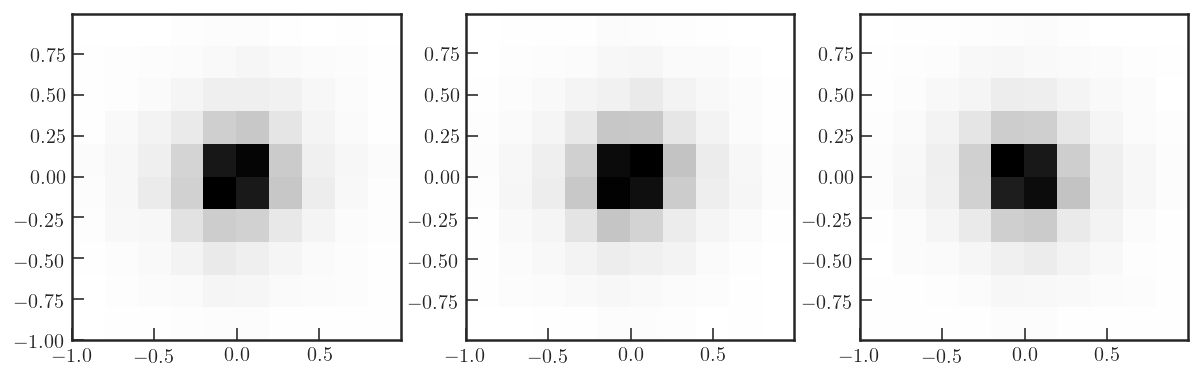

In [327]:
import scipy.linalg
num = 10000
rhos = np.zeros((num, 3))
rhos_out = np.zeros((num, 3))
for i in range(num):
    rhos[i, :] = np.random.uniform(0, 2e-0, 3)
    #skewsym = np.array([[0, rhos[i, 0]], [-rhos[i, 0], 0]])
    skewsym = np.zeros((3, 3))
    skewsym[np.tril_indices(3, k=-1)] = rhos[i, :]
    skewsym[np.triu_indices(3, k=1)] = -rhos[i, :]
    ortho = scipy.linalg.expm(skewsym)
    #ortho2 = np.diag(np.repeat(1, 3)) + skewsym + np.dot(skewsym, skewsym) / 2  + np.dot(np.dot(skewsym, skewsym), skewsym) / 6
    #print(ortho)
    #print(ortho2)
    vvars = np.random.uniform(0, 1, 3)
    #vvars[1] = vvars[0]*2
    covar = np.dot(ortho.T, np.dot(np.diag(vvars), ortho))
    
    rhos_out[i, 0] = covar[1, 0] / np.sqrt(covar[0, 0]*covar[1, 1])
    rhos_out[i, 1] = covar[2, 0] / np.sqrt(covar[0, 0]*covar[2, 2])
    rhos_out[i, 2] = covar[2, 1] / np.sqrt(covar[1, 1]*covar[2, 2])
    
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
axs[0].hist2d(rhos_out[:, 0], rhos_out[:, 1], cmap="Greys");
axs[1].hist2d(rhos_out[:, 1], rhos_out[:, 2], cmap="Greys");
axs[2].hist2d(rhos_out[:, 0], rhos_out[:, 2], cmap="Greys");

In [328]:
sigma = 3
nmarggrid = 5
varpimins = varpis - sigma * varpis_var**0.5 
varpimins[varpimins<1e-4] = 1e-4
varpimaxs = varpis + sigma * varpis_var**0.5 
deltavarpis = (varpimaxs - varpimins) / (nmarggrid-1)
varpigrids = varpimins[:, None] + deltavarpis[:, None] * np.arange(nmarggrid)[None, :]
logvarpigridsp10_padded = np.zeros((nobj, nmarggrid, ncols + 1))
logvarpigridsp10_padded[:, :, 0] = 5*np.log10(varpigrids) - 10.

In [337]:
obsabsmagcolors_minmaxs = np.zeros((ncols+1, 2))
obsabsmagcolors_minmaxs[0, 0] = np.min(obsabsmags)
obsabsmagcolors_minmaxs[1:, 0] = np.min(obscolors, axis=0)
obsabsmagcolors_minmaxs[0, 1] = np.max(obsabsmags)
obsabsmagcolors_minmaxs[1:, 1] = np.max(obscolors, axis=0)
ngridpoints = 15
lines = [np.linspace(obsabsmagcolors_minmaxs[i, 0], obsabsmagcolors_minmaxs[i, 1], ngridpoints) for i in range(ncols+1)]
mids = [(line[1:] + line[:-1])/2 for line in lines]
flatmeshes = [mesh.ravel() for mesh in np.meshgrid(*mids, indexing="ij")]
H, E = np.histogramdd(np.hstack((obsabsmags[:, None], obscolors)), bins=lines)
selection = np.where(H > 1)

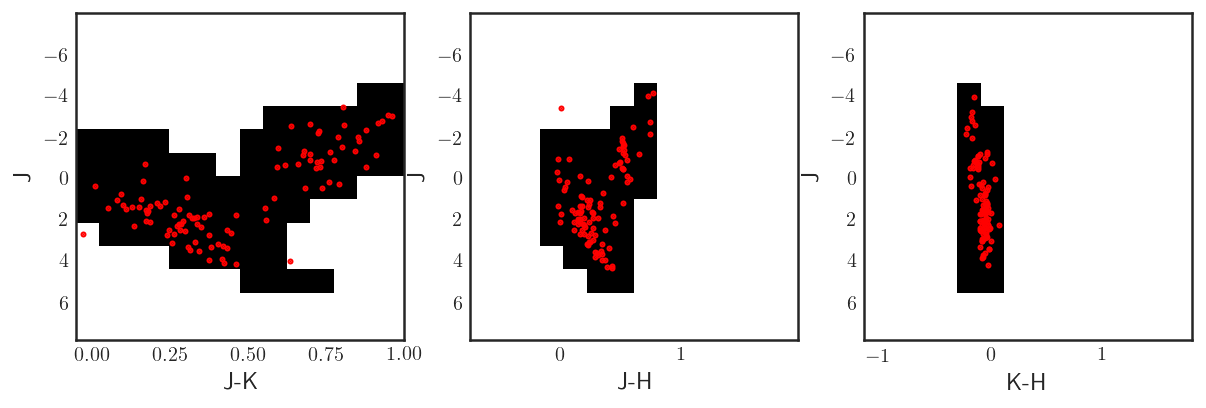

In [338]:
fig, axs = plt.subplots(1, ncols, figsize=(10, 3), sharex=False, sharey=False)

if ncols == 1:
    axs = np.array([axs])
for i in range(ncols):
    ind = tuple([j for j in range(ncols+1) if j != 0 and j != i+1])
    post = H.sum(axis=ind)
    post = np.where(post > nobj//1000, 1, 0)
    axs[i].pcolormesh(E[i+1], E[0], post, cmap="Greys")
    ind = np.random.choice(nobj, 100, replace=False)
    
    axs[i].scatter(obscolors[ind, i], obsabsmags[ind], s=1, color='red')
    axs[i].set_ylim([obsabsmagcolors_minmaxs[0, 1], obsabsmagcolors_minmaxs[0, 0]])
    axs[i].set_ylabel(magname)
    axs[i].set_xlabel(colnames[i])

[[ 2.78455614  0.21250021  0.12992859  0.01746379]
 [ 0.5444719   0.66250009  0.51478577 -0.19189341]
 [ 1.66451402  0.28750019  0.32235718  0.01746379]
 [ 0.5444719   0.13750024  0.12992859  0.01746379]
 [ 2.78455614  0.28750019  0.32235718  0.01746379]
 [-1.69561233  0.73750007  0.51478577 -0.19189341]
 [-1.69561233  0.66250009  0.51478577 -0.19189341]
 [-1.69561233  0.66250009  0.51478577 -0.19189341]
 [ 2.78455614  0.28750019  0.32235718  0.01746379]
 [ 2.78455614  0.43750015  0.32235718  0.01746379]
 [ 0.5444719   0.58750011  0.51478577 -0.19189341]
 [ 1.66451402  0.28750019  0.12992859 -0.19189341]
 [-1.69561233  0.81250005  0.70721436 -0.19189341]
 [ 1.66451402  0.28750019  0.12992859  0.01746379]
 [ 2.78455614  0.21250021  0.12992859  0.01746379]
 [-0.57557022  0.73750007  0.51478577 -0.19189341]
 [-1.69561233  0.81250005  0.70721436 -0.19189341]
 [ 2.78455614  0.43750015  0.32235718  0.01746379]
 [-1.69561233  0.66250009  0.51478577 -0.19189341]
 [-0.57557022  0.73750007  0.51

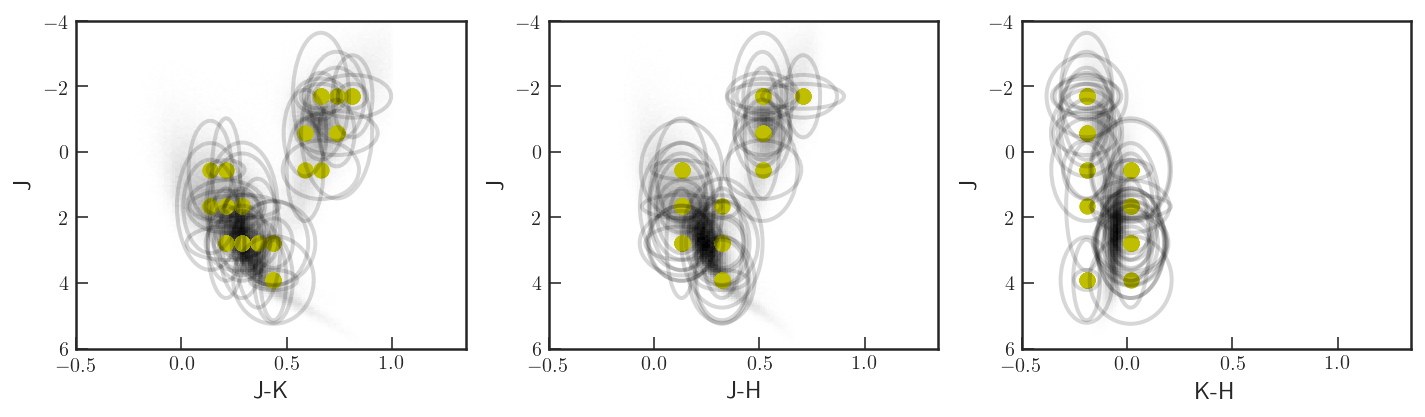

In [339]:
nbins = 40
binamps = np.repeat(1./nbins, nbins)
if False: # select positions among objects
    sel2 = np.random.choice(nobj, nbins, replace=False)
    binmus = np.hstack((obsabsmags[sel2][:, None], obscolors[sel2, :]))
else: # select positions uniformly on grid
    selection = np.where(H.ravel() > nobj // 100)[0]
    sel2 = np.random.choice(selection, nbins, replace=True)
    binmus = np.vstack([mesh[sel2] for mesh in flatmeshes]).T
binvars = np.vstack((np.random.uniform(0.1, 1.0, nbins)**2, 
                     [np.random.uniform(0.03, 0.1, nbins)**2 for i in range(ncols)])).T 
print(binmus)

bincovars = np.zeros((nbins, ncols+1, ncols+1))
for b in range(nbins):
    bincovars[b, :, :] = np.diag(binvars[b, :])

from matplotlib.patches import Ellipse

fig, axs = plt.subplots(1, ncols, figsize=(10, 3), sharex=False, sharey=False)
if ncols == 1:
    axs = np.array([axs])
rr = [[-0.5, 1.35], [-4, 6]]
for i in range(ncols):
    
    axs[i].hist2d(obscolors[:, i] - dustamps * dustcoefs[i+1], 
                     obsabsmags - dustamps * dustcoefs[0], 
                     150, range=rr, cmap="gray_r")
    
    for b in range(nbins):
        bincovar = np.matrix([[bincovars[b, 0, 0], bincovars[b, i+1, 0]], 
                              [bincovars[b, 0, i+1], bincovars[b, i+1, i+1]]])
        w, v = np.linalg.eig(bincovar[:, :])
        angle = 90. + 180/np.pi * 0.5 * np.arctan(2 * bincovar[0, 1] / (bincovar[1, 1] - bincovar[0, 0]))
        e = Ellipse(xy=binmus[b, :][np.array([i+1, 0])], 
                    width=4*w[0]**0.5, height=4*w[1]**0.5, angle=angle, ec='k', fill=False)
        axs[i].add_artist(e)
        e.set_alpha(binamps[b]**0.5)
        axs[i].scatter(binmus[b, i+1], binmus[b, 0], c='y')
        axs[i].scatter(binmus[b, i+1], binmus[b, 0], c='y')
        axs[i].set_ylabel(magname)
        axs[i].set_xlabel(colnames[i])
        axs[i].set_ylim(rr[1][::-1])
        axs[i].set_xlim(rr[0])
fig.tight_layout()


In [370]:
def fun(zs_in):
    zs = 1e-2 + 0.99 / (1 + np.exp(-zs_in))
    fac = np.array([1.0]*nbins)
    zsb = np.array([1.0]*nbins)
    for i in range(nbins-1):
        fac[i] = 1. - zs[i]
        zsb[i+1] = zs[i]
    binamps = np.cumprod(zsb) * fac
    return binamps

def obj(zs_in):
    binamps_target = np.repeat(1/nbins, nbins)
    return np.sum((fun(zs_in) - binamps_target)**2.)

from scipy.optimize import minimize

res = minimize(obj, x0=np.random.uniform(-2, 2, nbins-1))

print(res.success, res.x)
binamps = fun(res.x)
print(binamps)
zs = res.x

True [ 3.64800496  3.62723118  3.59733643  3.57328596  3.54607642  3.51506142
  3.48383599  3.45743802  3.4243961   3.39069946  3.35477609  3.32132458
  3.28445073  3.25114848  3.21113052  3.1662825   3.12415986  3.08171907
  3.03620791  2.98323835  2.93190901  2.87991043  2.82564065  2.76167067
  2.69927957  2.62854426  2.55369525  2.4730937   2.38828727  2.29048285
  2.18633407  2.06690212  1.93475603  1.77442146  1.59353117  1.37914988
  1.08556706  0.68036382 -0.02101521]
[ 0.02512819  0.02499766  0.02507609  0.02499216  0.02496869  0.02501846
  0.02505088  0.02494291  0.02497553  0.02499782  0.02504633  0.0250046
  0.02501606  0.02490818  0.02493024  0.02502905  0.02501678  0.02496734
  0.02494414  0.02504564  0.02504344  0.02499117  0.02492255  0.02500474
  0.02495313  0.02499584  0.02501221  0.02502279  0.02496864  0.02502627
  0.02499389  0.02502817  0.02499012  0.0251187   0.02505835  0.02485458
  0.02498261  0.02495341  0.02502139  0.02500127]


In [371]:
import tensorflow as tf
from scipy.special import logit

def tfzs_to_alphas(zs):
    fac = tf.concat((1 - zs, tf.ones((1, 1, 1))), axis=1)
    zsb = tf.concat((tf.ones((1, 1, 1)), zs), axis=1)
    fs = tf.cumprod(zsb, axis=1) * fac
    return fs
    
Zs = tf.Variable(zs.reshape((1, nbins-1, 1)), dtype=tf.float32, name="Zs")
Binmus_in = tf.Variable(logit((binmus+4)/10), dtype=tf.float32, name="Binmus_in")
Binvars_in = tf.Variable(logit((binvars-1e-4)/1.5), dtype=tf.float32, name="Binvars_in")

Binmus = -4 + 10 * tf.sigmoid(Binmus_in)
Binvars = 1e-4 + 1.5 * tf.sigmoid(Binvars_in)
Binamps = tfzs_to_alphas(1e-2 + 0.99*tf.sigmoid(Zs))

Obsmagsandcolors = tf.placeholder(shape=(None, ncols + 1), dtype=tf.float32)
Obsmagsandcolors_var = tf.placeholder(shape=(None, ncols + 1, ncols + 1), dtype=tf.float32)

if True:
    Dustamps = tf.placeholder(shape=(None, ), dtype=tf.float32)
else:
    Dust_lmn_real = tf.Variable(dust_lmn[:, :, None, None].real, dtype=tf.float32, name="Dust_lmn_real")
    Dust_lmn_imag = tf.Variable(dust_lmn[:, :, None, None].imag, dtype=tf.float32, name="Dust_lmn_imag")
    Dust_lmn = tf.complex(Dust_lmn_real, Dust_lmn_imag)
    SFB_mat = tf.placeholder(shape=(Lt, N, Npix, Nr), dtype=tf.complex64)
    Dust_map = tf.cumsum(tf.exp(tf.real(tf.reduce_sum(SFB_mat * Dust_lmn, axis=(0, 1))) - 4.0), axis=1)
    #Dust_map_diff = tf.Variable(np.random.randn(Npix, Nr), dtype=tf.float32, name="Dust_map_diff")
    #Dust_map = tf.cumsum(tf.sigmoid(Dust_map_diff)/Nr, axis=1)
    AngRadlocsgrid = tf.placeholder(shape=(None, nmarggrid, 2), dtype=tf.int32)
    Dustamps = tf.gather_nd(Dust_map, AngRadlocsgrid)
    
Dustcoefs = tf.placeholder(shape=(ncols+1, ), dtype=tf.float32)
Varpigrids = tf.placeholder(shape=(None, nmarggrid, ), dtype=tf.float32)
Logvarpigridsp10_padded = tf.placeholder(shape=(None, nmarggrid, ncols + 1), dtype=tf.float32)
Deltavarpis = tf.placeholder(shape=(None, ), dtype=tf.float32)
Obsvarpis = tf.placeholder(shape=(None, ), dtype=tf.float32)
Obsvarpis_var = tf.placeholder(shape=(None, ), dtype=tf.float32)

if True:
    Skewsym_vals = tf.Variable(1e-2+np.zeros(((nbins*(ncols+1)*ncols//2), )), 
                               dtype=tf.float32, name="skewsym_vals")
    inds = [np.vstack([np.repeat(b, (ncols+1)*ncols//2), np.tril_indices(ncols+1, k=-1)]) for b in range(nbins)]
    indices = np.concatenate([list(zip(*inds[b])) for b in range(nbins)])
    Indices = tf.constant([list(i) for i in indices], dtype=tf.int64)
    #Skewsymt2 = tf.sigmoid(tf.sparse_to_dense(sparse_indices=Indices, output_shape=[nbins, ncols+1, ncols+1], \
    #                             sparse_values=Skewsym_vals, default_value=0, \
    #                             validate_indices=True)) 
    Skewsym = 2 * tf.sigmoid(tf.scatter_nd(Indices, Skewsym_vals, [nbins, ncols+1, ncols+1]))
    Skewsym -= tf.transpose(Skewsym, perm=[0, 2, 1])
    fac = 1.0
    if False:
        Newterm = tf.concat([tf.diag(tf.ones((ncols+1)))[None, :, :] for b in range(nbins)], axis=0)
        Orthogonal = 1*Newterm
        for i in range(1, 10):
            fac *= i
            Newterm = tf.matmul(Newterm, Skewsym)
            Orthogonal += Newterm / fac
    else:
        Orthogonal = tf.concat([tf.diag(tf.ones((ncols+1)))[None, :, :] for b in range(nbins)], axis=0)\
            + Skewsym + tf.matmul(Skewsym, Skewsym) / 2 + tf.matmul(tf.matmul(Skewsym, Skewsym), Skewsym) / 6
    
    Binvarsdiag = tf.concat([tf.diag(Binvars[b, :])[None, :, :] for b in range(nbins)], axis=0)
    Bincovars = tf.matmul(tf.transpose(Orthogonal, perm=[0, 2, 1]), 
                          tf.matmul(Binvarsdiag, Orthogonal))
    Bincovars = tf.scalar_mul(0.5, Bincovars + tf.transpose(Bincovars, perm=[0, 2, 1]))
else:  
    Skewsym_vals = tf.constant(np.random.randn((nbins*(ncols+1)*ncols//2), ), 
                               dtype=tf.float32, name="skewsym_vals")
    Bincovars = tf.concat([tf.diag(Binvars[b, :])[None, :, :] for b in range(nbins)], axis=0)
    
Covmatrices = Bincovars[None, :, :, :] + Obsmagsandcolors_var[:, None, :, :] # nobj, nbins, ncols+1, ncols+1
Covmatrices_chol = tf.cholesky(Covmatrices)[:, :, None, :, :] *\
    tf.ones((1, nbins, nmarggrid, ncols+1, ncols+1)) # nobj, nbins, nmarggrid, ncols+1, ncols+1
Logdet_mags = tf.log(tf.matrix_determinant(Covmatrices))
Logdet_varpis = tf.log(Obsvarpis_var[:, None])

# nobj, nbins, nk, ncols + 1, 1
Meanvecs = Obsmagsandcolors[:, None, None, :, None] \
    - Dustcoefs[None, None, None, :, None] * Dustamps[:, None, None, None, None] \
    - Binmus[None, :, None, :, None] + Logvarpigridsp10_padded[:, None, :, :, None]

Chi2s_mags = tf.reduce_sum(
    tf.multiply(Meanvecs, tf.cholesky_solve(Covmatrices_chol, Meanvecs)), axis=(3, 4)) # nobj, nbins

# for debugging:
#Covmatrices = Covmatrices[:, :, None, :, :] * tf.ones((1, nbins, nmarggrid, ncols+1, ncols+1))
#Chi2s_mags = tf.reduce_sum(
#    tf.multiply(Meanvecs, tf.matrix_solve(Covmatrices, Meanvecs)), axis=(3, 4)) # nobj, nbins

Chi2s_varpis = tf.divide(tf.pow(Obsvarpis[:, None] - Varpigrids, 2), Obsvarpis_var[:, None])

# nobj, nbins, nk
Logprobgrid = tf.log(Deltavarpis[:, None, None] * Binamps) +\
    tf.scalar_mul(-0.5, Chi2s_mags + Logdet_mags[:, :, None] + Chi2s_varpis[:, None, :] + Logdet_varpis[:, None, :])

MinusLnprob = - tf.reduce_sum(tf.reduce_logsumexp(Logprobgrid, axis=(1, 2)), axis=0)

In [372]:
Optimizer = tf.train.AdamOptimizer(learning_rate=1e-2)\
    .minimize(MinusLnprob, var_list=[Zs, Binmus_in, Binvars_in, Skewsym_vals])#, Dust_lmn_real, Dust_lmn_imag]) #
# GradientDescentOptimizer AdadeltaOptimizer AdamOptimizer
    
with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())

    for i in range(3001):
        
        ind = np.random.choice(nobj, nobj // 500, replace=False)
        
        _, mlnp, binamps2, binmus2, binvars2, bincovars2, skewsym_vals, skewsym =\
           sess.run([Optimizer, MinusLnprob, Binamps, Binmus, Binvars, Bincovars, Skewsym_vals, Skewsym],
                     feed_dict={Obsmagsandcolors: obsmagsandcolors[ind, :], 
                                Obsmagsandcolors_var: obsmagsandcolors_var[ind, :, :],
                                Dustamps: dustamps[ind], Dustcoefs: dustcoefs, Varpigrids: varpigrids[ind, :],
                                Logvarpigridsp10_padded: logvarpigridsp10_padded[ind, :, :],
                                Deltavarpis: deltavarpis[ind], Obsvarpis: varpis[ind], Obsvarpis_var: varpis_var[ind]
                               }) 
        
        if i % 100 == 0:
            print(i, mlnp, end=" ")

0 -11156.3 100 -15709.4 200 -16326.3 300 -16428.5 400 -16617.0 500 -16782.5 600 -16547.9 700 -16678.4 800 -16746.5 900 -16703.8 1000 -16707.9 1100 -16731.3 1200 -16669.8 1300 -16762.3 1400 -16697.2 1500 -16710.1 1600 -16635.7 1700 -16670.9 1800 -16661.5 1900 -16790.3 2000 -16711.8 2100 -16819.9 2200 -16593.4 2300 -16712.9 2400 -16750.0 2500 -16720.8 2600 -16767.9 2700 -16589.8 2800 -16621.3 2900 -16716.8 3000 -16595.0 

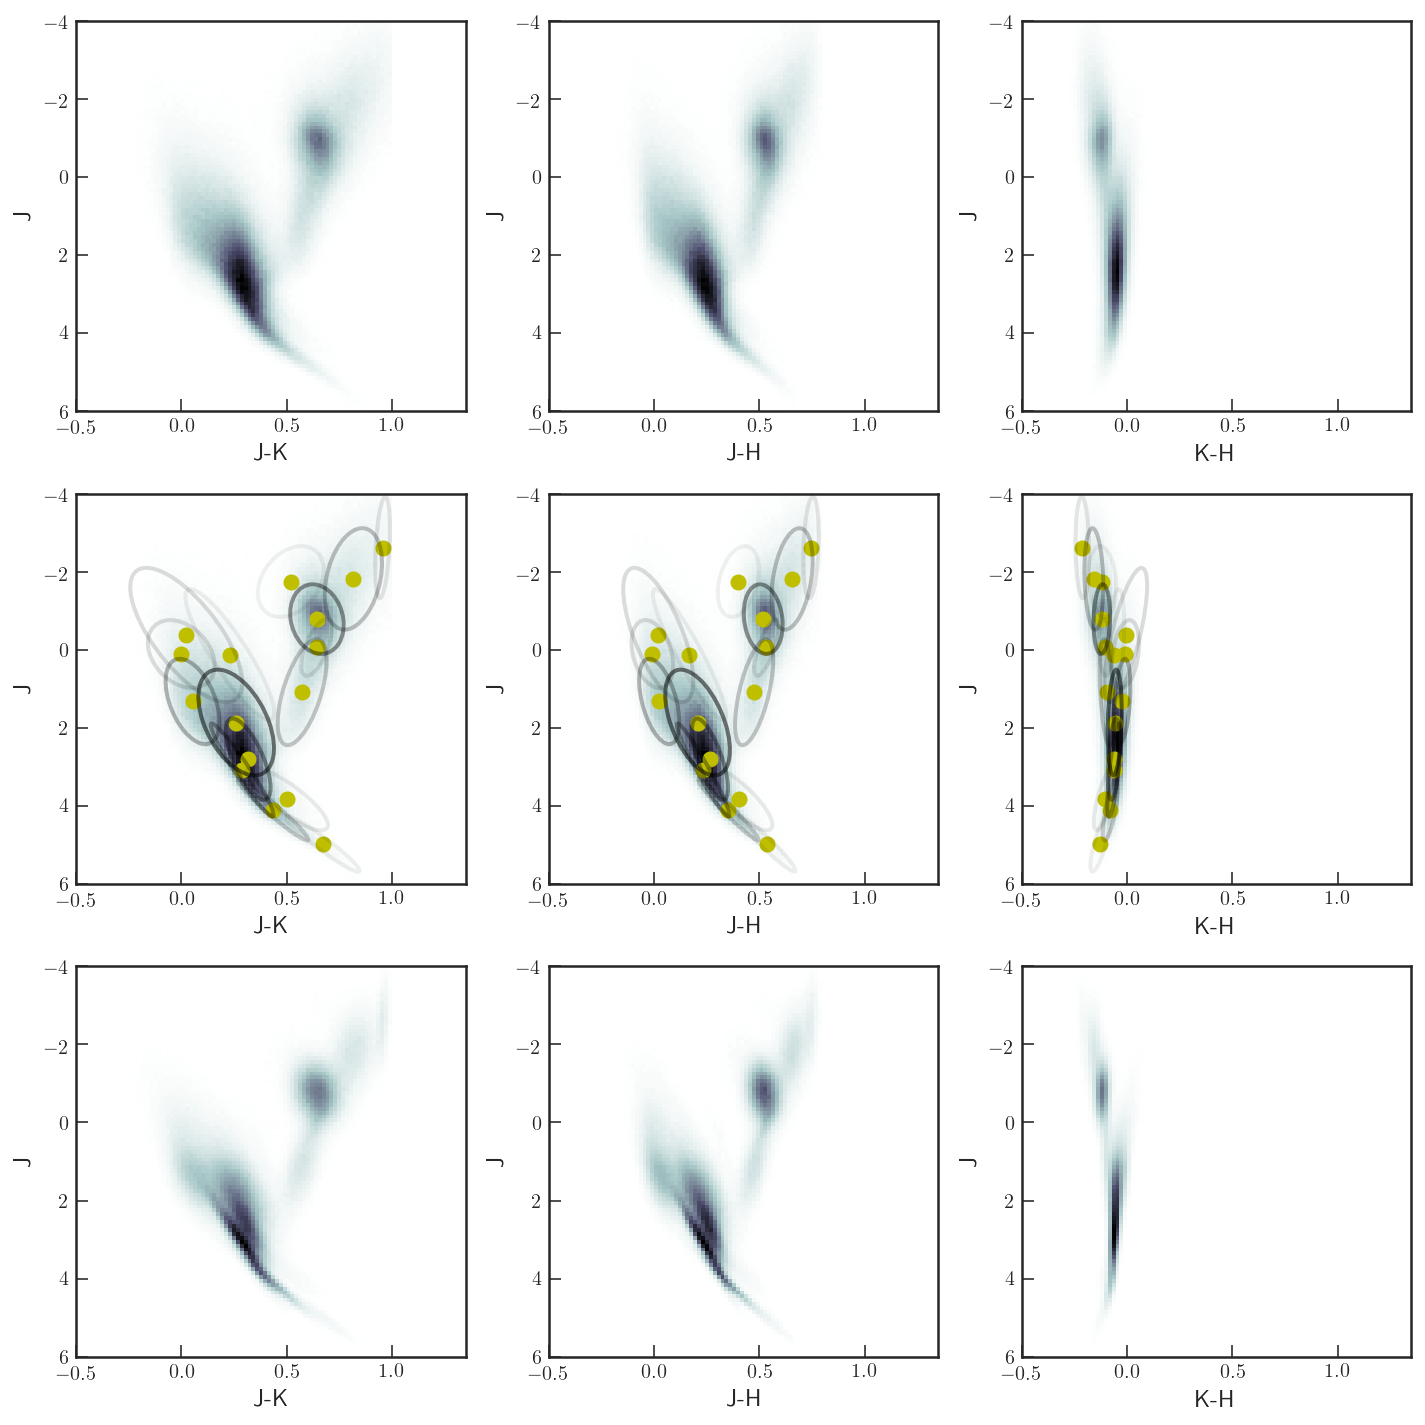

In [382]:
from matplotlib.patches import Ellipse

fig, axs = plt.subplots(3, ncols, figsize=(10, 10), sharex=False, sharey=False)
if ncols == 1:
    axs = axs.reshape((-1, 1))
rr = [[-0.5, 1.35], [-4, 6]]
nbs2 = np.random.multinomial(nobj, binamps2.ravel()/(binamps2.sum()+1e-10))

cmap = "bone_r"
points = np.vstack([np.random.multivariate_normal(binmus2[b, :], bincovars2[b, :, :], size=nbs2[b]) 
                            for b in range(nbins)]) 
for i in range(ncols):
    
    for k in range(2):
        axs[k, i].hist2d(obscolors[:, i] - dustamps * dustcoefs[i+1], 
                     obsabsmags - dustamps * dustcoefs[0], 
                     100, range=rr, cmap=cmap) 
    axs[2, i].hist2d(points[:, i+1], points[:, 0], 100, range=rr, cmap=cmap)
    
    for b in np.where(binamps2.ravel() > np.max(binamps2)/100)[0]:#range(nbins):
        
        bincovar = np.matrix([[bincovars2[b, 0, 0], bincovars2[b, i+1, 0]], 
                              [bincovars2[b, 0, i+1], bincovars2[b, i+1, i+1]]])
        w, v = np.linalg.eig(bincovar[:, :])
        angle = 90. + 180/np.pi * 0.5 * np.arctan(2 * bincovar[0, 1] / (bincovar[1, 1] - bincovar[0, 0]))
        e = Ellipse(xy=binmus2[b, :][np.array([i+1, 0])], width=4*w[0]**0.5, height=4*w[1]**0.5, angle=angle, ec='k', fill=False)
        axs[1, i].add_artist(e)
        e.set_alpha(binamps2[0, b, 0]**0.5)
        axs[1, i].scatter(binmus2[b, i+1], binmus2[b, 0], c='y') 
        
    for k in range(3):                 
        axs[k, i].set_ylim(rr[1][::-1])
        axs[k, i].set_xlim(rr[0])
        axs[k, i].set_ylabel(magname)
        axs[k, i].set_xlabel(colnames[i])
fig.tight_layout()
fig.savefig('multicolor_hrd_gmm.png', dpi=300)
